In [1]:
# !pip install matplotlib
# !pip install pandas
# !pip install openpyxl  # for read_excel to work

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [3]:
# The keys are indexes for the columns
RENAMED_QUESTIONS = {
    2: 'Gender',
    3: 'Experience with Meditation',
    4: 'Ordering',
    # col 5
    6: 'Context 1',
    # col 7 is dropped
    8: 'Context 2',
    # col 9 is dropped
    # col 10 is dropped
    11: 'Content quality (audio-only)',
    12: 'Content quality (video+audio)',
    13: 'Audio quality (audio-only)',
    14: 'Audio quality (video+audio)',
    15: 'Music Added to Experience',
    16: 'Visuals Matched with Audio',
    17: 'Visuals Added to Experience',
    18: 'Audio-Only Overall Rating',
    19: 'Video+Audio Overall Rating',
    20: 'Which more Personalized',
    21: 'Would meditate more if more personalized',
    22: 'Would try other Meditation Types',
    23: 'Would Color Scheme be better',
}

In [4]:
DATA_FILE_PATH = 'meditation-study-responses.xlsx'
df = pd.read_excel(DATA_FILE_PATH)  # , engine='openpyxl'  # Add this if not working

# Rename the columns
for key in RENAMED_QUESTIONS.keys():
    df.columns.values[key] = RENAMED_QUESTIONS[key]

# Delete the unnecessary columns
COLUMN_INDEXES_TO_DROP = df.columns[[0, 1, 5, 7, 9, 10, 24, 25]]
df = df.drop(COLUMN_INDEXES_TO_DROP, axis=1)

# Combine the 'Context' column
df['Context'] = df['Context 1'].fillna(df['Context 2'])
df.drop(columns=['Context 1', 'Context 2'], inplace=True)

print(df.shape)

(9, 17)


### Metadata

Half of the participants were men and the other half women.

In [5]:
df['Gender'].value_counts()

Female    5
Male      4
Name: Gender, dtype: int64

In [6]:
df['Experience with Meditation'].value_counts()

0       4
6-10    3
3-5     1
1-3     1
Name: Experience with Meditation, dtype: int64

In [7]:
df[['Gender', 'Experience with Meditation']].value_counts()

Gender  Experience with Meditation
Male    0                             3
Female  6-10                          2
        0                             1
        1-3                           1
        3-5                           1
Male    6-10                          1
dtype: int64

### Experiment

The order of the meditation sessions was alternated between participants.

In [8]:
df['Ordering'].value_counts()

Option 2    5
Option 1    4
Name: Ordering, dtype: int64

Most of the participants voted for the option 'I'm very stressed about school (stressed).' as most of them are university students.

In [9]:
df['Context'].value_counts()

I'm very stressed about school (stressed).                         7
I'm very tired and sleepy after a long day of school. (sleepy).    1
I'm very sad about losing a loved one (sad).                       1
Name: Context, dtype: int64

Q: For the video and audio meditation, did the music add to the experience?

Rating:
- 1: No, much worse
- 5: Yes, much better

People in general prefered having music. Nevertheless, some of them did not enjoy having it and none gave the maximum score, so it would be interesting to explore other types of music and play with some of its parameters such as the volume or the synchronization with the audio.

In [10]:
column = 'Music Added to Experience'
print(f"{df[column].mean():.2f} ± {df[column].std():.2f}")
print(df[column].value_counts())

3.11 ± 1.05
4    4
3    3
2    1
1    1
Name: Music Added to Experience, dtype: int64


People thought that the video did not properly matching the audio. To take into account:

- Sleepy: Mentions to close the eyes until the end
- Stressed: Mentions to close the eyes or leave them lightly closed
- Sad: Does not mention to close the eyes

In [11]:
column = 'Visuals Matched with Audio'
print(f"{df[column].mean():.2f} ± {df[column].std():.2f}")
print(df[column].value_counts())

2.33 ± 1.22
1    3
3    2
4    2
2    2
Name: Visuals Matched with Audio, dtype: int64


People thought that the visuals did not add much value to the experience. Listening to the audios again:
- Sleepy: Mentions to close the eyes until the end
- Stressed: Mentions to close the eyes or leave them lightly closed
- Sad: Does not mention to close the eyes

In [12]:
column = 'Visuals Added to Experience'
print(f"{df[column].mean():.2f} ± {df[column].std():.2f}")
print(df[column].value_counts())

2.33 ± 1.22
1    3
3    2
4    2
2    2
Name: Visuals Added to Experience, dtype: int64


Q: Did either of the meditations feel more personalized (considering anything you selected in this form)? Note: Select 3 for neither.

Ratings:
- 1: Definitely Audio-Only
- 5: Definitely Video+Audio

In general, people did not notice that the video created from the new system was more personalized. Nevertheless, we did not let them choose:
- The context
- The type of meditation

In [13]:
column = 'Which more Personalized'
print(f"{df[column].mean():.2f} ± {df[column].std():.2f}")
print(df[column].value_counts())

2.78 ± 1.30
3    4
1    2
4    1
5    1
2    1
Name: Which more Personalized, dtype: int64


Q: Could you see yourself meditating more regularly or benefitting from meditation if practices were more personalized?

Ratings:
- 0: Not at all
- 5: Definitely

In general, people would do it. Hence, there is high chance this system can help on increasing the number of people doing meditation.

In [14]:
column = 'Would meditate more if more personalized'
print(f"{df[column].mean():.2f} ± {df[column].std():.2f}")
print(df[column].value_counts())

3.33 ± 1.50
4    3
1    2
5    2
3    2
Name: Would meditate more if more personalized, dtype: int64


Q: In this study, you did a body-centered meditation, but there are many other types of meditation. See examples below. Could you imagine yourself in contexts where you would prefer any of the other types of meditation?

1. mindful observation - emphasizes the practice of mindfully observing one’s thoughts and emotions in a state of stillness and silence.
2. body-centered - involves concentrating, relaxing, and possible tensing specific parts of the body.
3. visual concentration - focuses on techniques like visualizations and concentration on visual objects to achieve a centered state of mind.
4. contemplation - encourages deep reflection on contradictions, paradoxes, or spiritual questions.
5. affect-centered - encompasses practices that cultivate positive emotions such as compassion, loving-kindness, and equanimity.
6. mantra - involves repeating a mantra (phrase, syllable, word, or sound) to facilitate meditation.
8. movement - combines mindfulness with physical activity, including manipulating the breath, walking, and sensory observation. This includes yoga.

Ratings:
- 0: Not at all
- 5: Definitely

Some people think it could be intereseting, though it is interesting that some people didn't find this insightful.

In [15]:
column = 'Would try other Meditation Types'
print(f"{df[column].mean():.2f} ± {df[column].std():.2f}")
print(df[column].value_counts())

3.33 ± 1.41
4    3
5    2
2    2
3    1
1    1
Name: Would try other Meditation Types, dtype: int64


I was expecting the person that voted with low value for one question would be voting for the second as well, but it is not the case.

In [16]:
column = ['Would try other Meditation Types', 'Would meditate more if more personalized']
print(df['Would try other Meditation Types'].corr(df['Would meditate more if more personalized']))
print(df[column].value_counts())

-0.11785113019775796
Would try other Meditation Types  Would meditate more if more personalized
2                                 4                                           2
1                                 3                                           1
3                                 3                                           1
4                                 1                                           1
                                  4                                           1
                                  5                                           1
5                                 1                                           1
                                  5                                           1
dtype: int64


Q: Consider if the video had different color schemes. Could you imagine yourself having a better experience with particular color schemes? See the below picture for examples.

Ratings:
- 0: Not at all
- 5: Definitely

In [17]:
column = 'Would Color Scheme be better'
print(f"{df[column].mean():.2f} ± {df[column].std():.2f}")
print(df[column].value_counts())

3.22 ± 1.56
2    3
5    3
1    1
4    1
3    1
Name: Would Color Scheme be better, dtype: int64


Not highly correlated both questions.

In [18]:
column = ['Visuals Added to Experience', 'Would Color Scheme be better']
print(df['Visuals Added to Experience'].corr(df['Would Color Scheme be better']))
print(df[column].value_counts())

0.2175970699446223
Visuals Added to Experience  Would Color Scheme be better
2                            5                               2
3                            2                               2
1                            1                               1
                             2                               1
                             4                               1
4                            3                               1
                             5                               1
dtype: int64


#### Disttributions:

11: 'Content quality (audio-only)'

12: 'Content quality (video+audio)'

Ttest_indResult(statistic=1.545539575522186, pvalue=0.1418915034532672)
7.33 ± 2.06
5.89 ± 1.90


/home/javiferfer/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/javiferfer/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


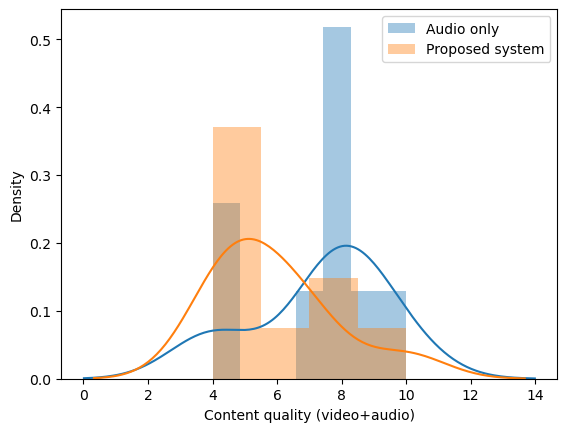

In [19]:
column_audio = 'Content quality (audio-only)'
column_system = 'Content quality (video+audio)'

print(stats.ttest_ind(df[column_audio].values, df[column_system].values, equal_var=False))
print(f"{df[column_audio].mean():.2f} ± {df[column_audio].std():.2f}")
print(f"{df[column_system].mean():.2f} ± {df[column_system].std():.2f}")

plt.figure()
sns.distplot(df[column_audio], label='Audio only')
sns.distplot(df[column_system], label='Proposed system')
plt.legend()

13: 'Audio quality (audio-only)'

14: 'Audio quality (video+audio)'

Ttest_indResult(statistic=2.378603373977088, pvalue=0.030189931793149532)
7.44 ± 2.24
4.89 ± 2.32


/home/javiferfer/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/javiferfer/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


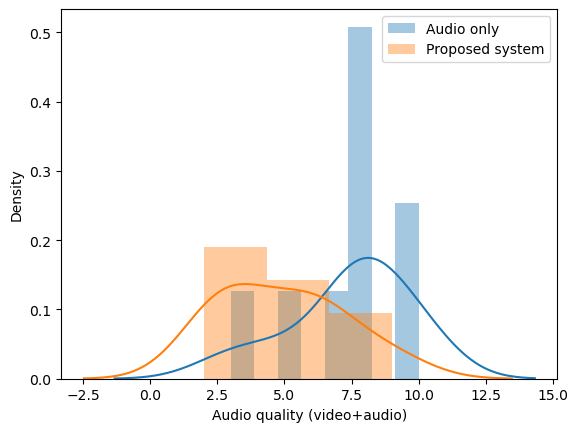

In [20]:
column_audio = 'Audio quality (audio-only)'
column_system = 'Audio quality (video+audio)'

print(stats.ttest_ind(df[column_audio].values, df[column_system].values, equal_var=False))
print(f"{df[column_audio].mean():.2f} ± {df[column_audio].std():.2f}")
print(f"{df[column_system].mean():.2f} ± {df[column_system].std():.2f}")

plt.figure()
sns.distplot(df[column_audio], label='Audio only')
sns.distplot(df[column_system], label='Proposed system')
plt.legend()

18: 'Audio-Only Overall Rating'

19: 'Video+Audio Overall Rating'

Ttest_indResult(statistic=1.8856180831641265, pvalue=0.07968413415019932)
7.33 ± 1.22
6.00 ± 1.73


/home/javiferfer/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/javiferfer/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


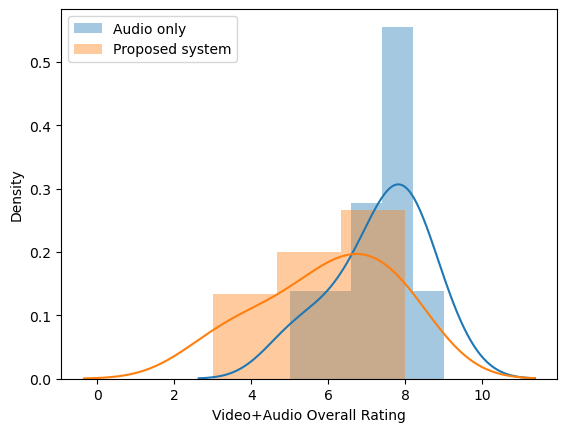

In [21]:
column_audio = 'Audio-Only Overall Rating'
column_system = 'Video+Audio Overall Rating'

print(stats.ttest_ind(df[column_audio].values, df[column_system].values, equal_var=False))
print(f"{df[column_audio].mean():.2f} ± {df[column_audio].std():.2f}")
print(f"{df[column_system].mean():.2f} ± {df[column_system].std():.2f}")

plt.figure()
sns.distplot(df[column_audio], label='Audio only')
sns.distplot(df[column_system], label='Proposed system')
plt.legend()